In [1]:
import pandas as pd
ex6data1 = pd.read_csv('ex6data1.csv',header=None)
print(ex6data1.head())

        0       1  2
0  1.9643  4.5957  1
1  2.2753  3.8589  1
2  2.9781  4.5651  1
3  2.9320  3.5519  1
4  3.5772  2.8560  1


In [2]:
positive_train_examples = ex6data1[ex6data1[2] == 1];
negative_train_examples = ex6data1[ex6data1[2] == 0];

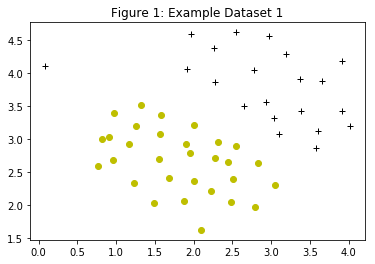

In [8]:
from matplotlib import pyplot as plt

def plotData(px,py,nx,ny,title):
    plt.plot(px,py,'k+',nx,ny,'yo')
    plt.title(title)
    plt.show()
    
plotData(positive_train_examples[0],positive_train_examples[1],
         negative_train_examples[0],negative_train_examples[1],
        "Figure 1: Example Dataset 1")

In [4]:
from sklearn import svm
X = ex6data1.as_matrix([0,1])
y = ex6data1.as_matrix([2])

svm_model = svm.SVC(kernel="linear")
svm_reg = svm_model.fit(X,y)

print(svm_reg)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [5]:
print(svm_reg.coef_,svm_reg.intercept_);

[[1.40718563 2.13398052]] [-10.34889778]


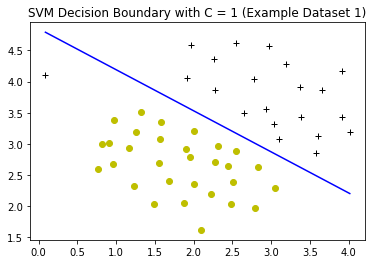

In [9]:
import numpy as np

def visualBoundaryLinear(X,y,model,title):
    xp = np.linspace(min(X[:,0]),max(X[:,0]),100)
    w = model.coef_[0]
    b = model.intercept_
    y = - (w[0] * xp + b) / w[1]
    plt.plot(xp,y,'b-')
    plotData(positive_train_examples[0],positive_train_examples[1],
         negative_train_examples[0],negative_train_examples[1],
         title)
    
visualBoundaryLinear(X,y,svm_model,"SVM Decision Boundary with C = 1 (Example Dataset 1)")


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


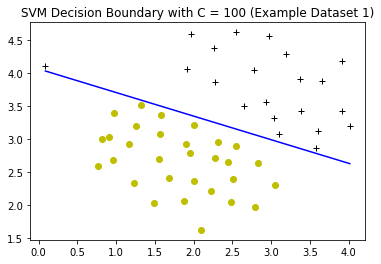

In [10]:
svm_model_c100 = svm.SVC(kernel="linear", C=100)
svm_reg_c100 = svm_model_c100.fit(X,y)
visualBoundaryLinear(X,y,svm_model_c100,"SVM Decision Boundary with C = 100 (Example Dataset 1)")